# 5.1 Game map analysis tests

In [292]:
%run "../Functions/5. Game map analysis.ipynb"

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (18,21,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (14,15,16,17,18,20,21,22,25,26,27,30,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Function tests

In [219]:
allTypes = rdf152['type'].dropna().unique()

types = ["death", "reach", "add", "craft", "remove", "select", "selectmenu"]
craftTypes = ["add", "craft", "remove", "select"]
gameTypes = ["hint", "pickup", "newfurthest", "newownrecord", "configure", "end", "complete", "restart", "start"]
webTypes = ["gotourl", "gotostudy", "gotomooc"]
adminTypes = ["switchtogameversion", "switchfromgameversion", "webconfigure"]

In [144]:
allTypes

array(['start', 'selectmenu', 'add', 'switchfromgameversion', 'craft',
       'select', 'remove', 'death', 'reach', 'pickup', 'newfurthest',
       'newownrecord', 'configure', 'end', 'restart',
       'switchtogameversion', 'gotourl', 'hint', 'gotostudy', 'complete',
       'gotomooc', 'webconfigure'], dtype=object)

### WARNING: very long test

In [145]:
allLocatedEventsDF = filterAndLocateEvents(allTypes)

locatedEventsDF = filterAndLocateEvents(types)

craftLocatedEventsDF = filterAndLocateEvents(craftTypes)

gameLocatedEventsDF = filterAndLocateEvents(gameTypes)

webLocatedEventsDF = filterAndLocateEvents(webTypes)

adminLocatedEventsDF = filterAndLocateEvents(adminTypes)

In [147]:
len(allLocatedEventsDF)

73569

In [148]:
print("minX=" + str(min(allLocatedEventsDF['x'])))
print("maxX=" + str(max(allLocatedEventsDF['x'])))
print("minY=" + str(min(allLocatedEventsDF['y'])))
print("maxY=" + str(max(allLocatedEventsDF['y'])))

minX=-1152
maxX=539
minY=-1161
maxY=-100


In [171]:
type(min(allLocatedEventsDF['x']))

int

In [170]:
#allLocatedEventsDF['x'].value_counts()

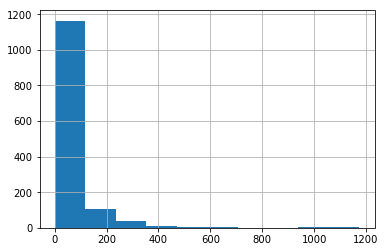

In [137]:
allLocatedEventsDF['x'].value_counts().hist()

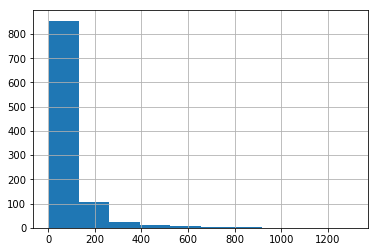

In [135]:
allLocatedEventsDF['y'].value_counts().hist()

In [80]:
len(locatedEventsDF)

62996

In [81]:
len(craftLocatedEventsDF)

47665

In [82]:
len(gameLocatedEventsDF)

10315

In [83]:
len(webLocatedEventsDF)

254

In [84]:
len(adminLocatedEventsDF)

4

### Plots

In [ ]:
plotLocatedEvents(allLocatedEventsDF, ['death'])

In [ ]:
plotLocatedEvents(allLocatedEventsDF, ['craft'])

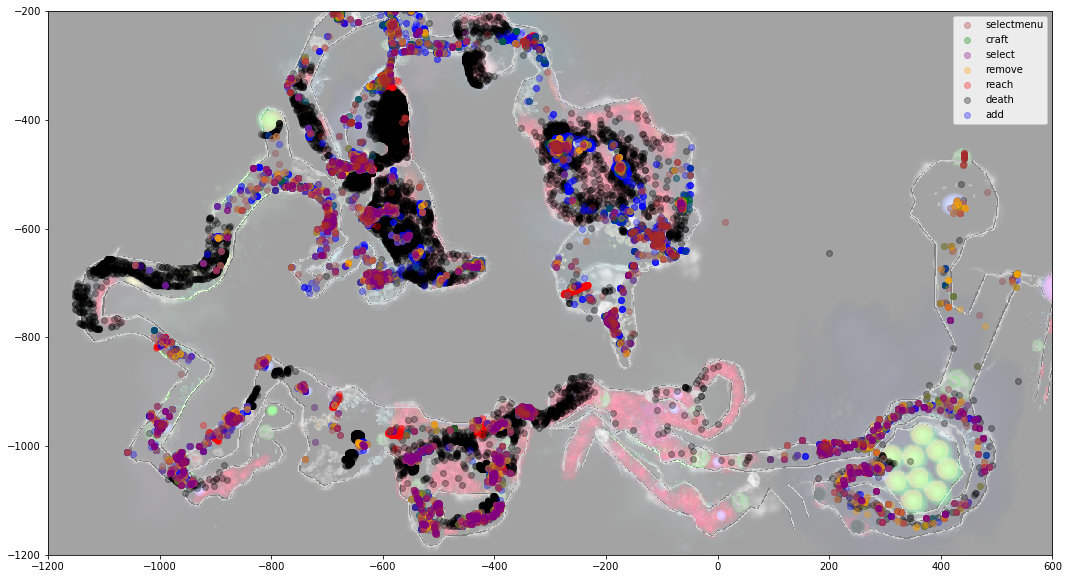

In [293]:
plotLocatedEvents(locatedEventsDF, types)

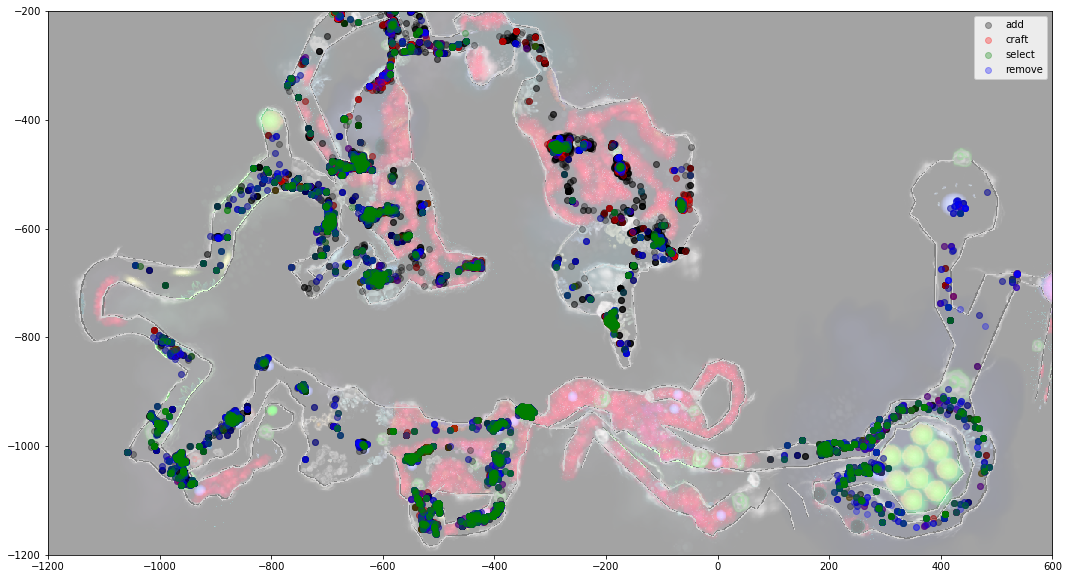

In [294]:
plotLocatedEvents(craftLocatedEventsDF, craftTypes)

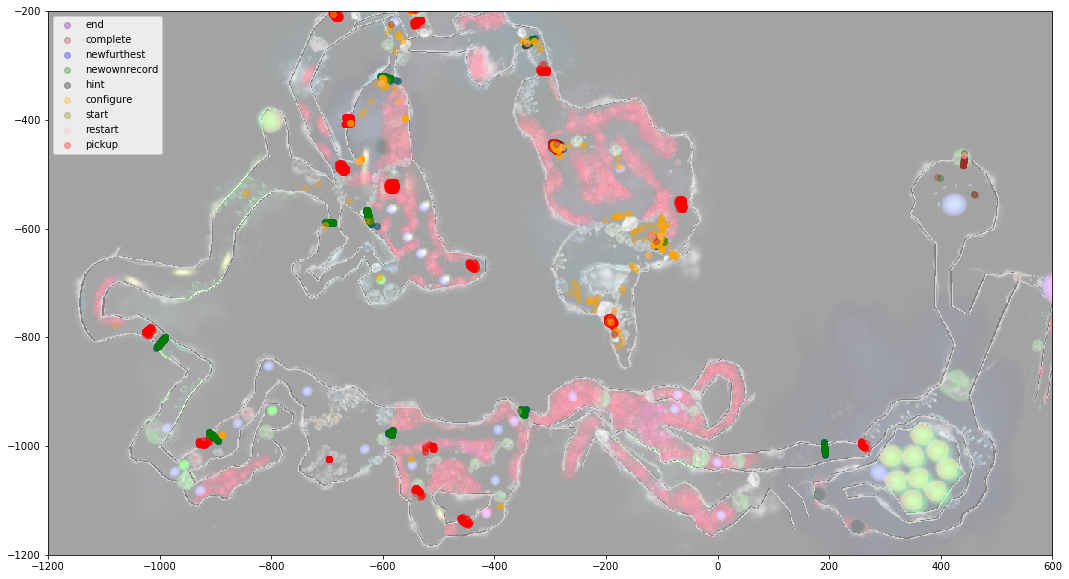

In [295]:
plotLocatedEvents(gameLocatedEventsDF, gameTypes)

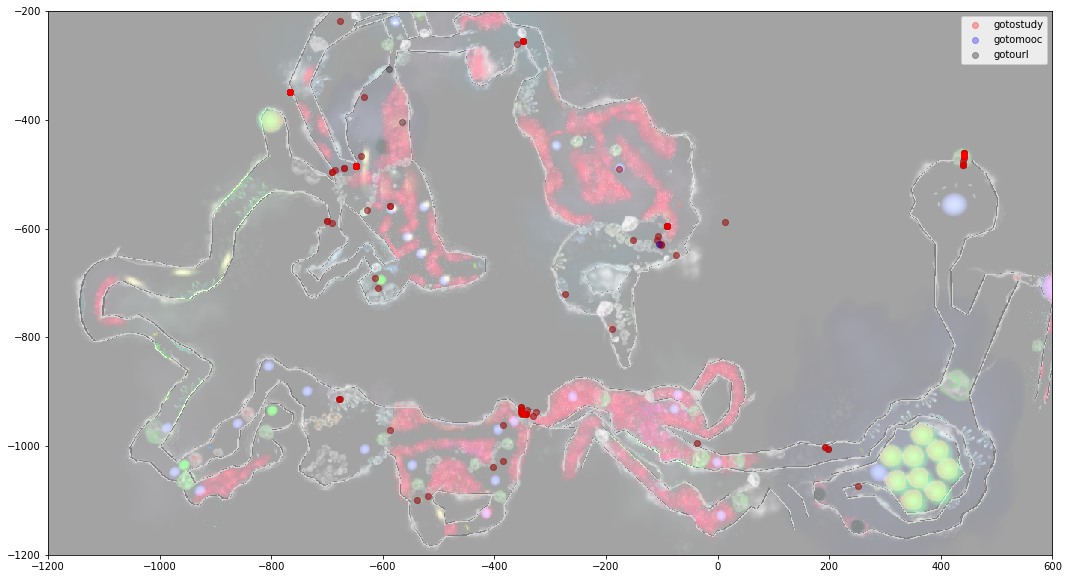

In [296]:
plotLocatedEvents(webLocatedEventsDF, webTypes)

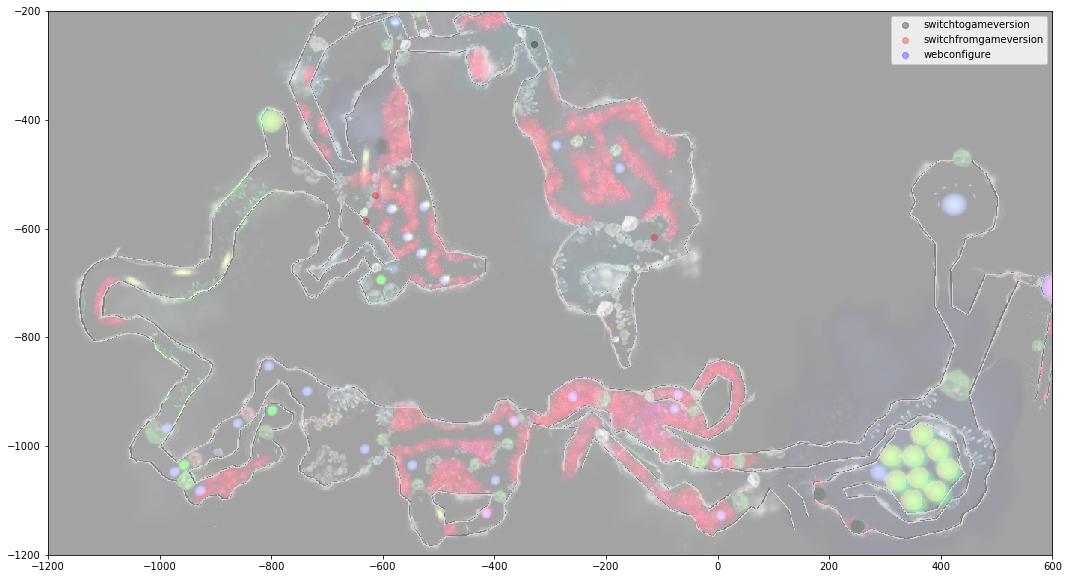

In [297]:
plotLocatedEvents(adminLocatedEventsDF, adminTypes)

## Tinkering

### filterAndLocateEvents

In [90]:
rdf152.columns

Index(['id', 'serverTime', 'userTime', 'gameVersion', 'playerId',
       'playerBirthdate', 'playerRegion', 'playerCountry', 'playerGender',
       'playerExternalId', 'playerCustomData', 'type', 'coordinates',
       'section', 'customData.biobrick', 'customData.devices',
       'customData.slot', 'customData.sound', 'customData',
       'customData.duration', 'customData.nanobot', 'customData.language',
       'customData.controls', 'customData.chapter', 'customData.life',
       'customData.source', 'customData.platform',
       'customData.localplayerguid', 'customData.sametab', 'customData.device',
       'customData.energy', 'customData.option', 'customData.newtab',
       'customData.dnabit', 'customData.count', 'customData.plasmid',
       'customData.total', 'customData.message', 'customData.graphics'],
      dtype='object')

In [91]:
#rdf152['customData.chapter'].dropna().head()

#### Filter columns

In [92]:
mapRelevantColumns = ['type', 'section', 'coordinates']
mapDF = rdf152.loc[:,mapRelevantColumns]
len(mapDF)

82915

In [93]:
mapDF = mapDF.dropna()
len(mapDF)

75601

#### Filter by event type

In [94]:
mapDF = mapDF[mapDF["type"].isin(types)]
mapDF.head()

,type,section,coordinates
10,reach,tutorial1.Checkpoint00,"[-259, -713]"
11,death,tutorial1.Checkpoint00,"[-259, -713]"
12,death,tutorial1.Checkpoint00,"[-264, -708]"
14,select,tutorial1.Checkpoint00,"[-192, -767]"
15,craft,tutorial1.Checkpoint00,"[-192, -767]"


#### Filter by section

In [95]:
tutorial1DF = mapDF[(mapDF['section'].str.startswith('tutorial1'))]
#sandbox2DF = mapDF[(mapDF['section'].str.startswith('sandbox'))]
tutorial1DF.head(2)

,type,section,coordinates
10,reach,tutorial1.Checkpoint00,"[-259, -713]"
11,death,tutorial1.Checkpoint00,"[-259, -713]"


In [96]:
len(tutorial1DF)

62996

#### [x,y] coordinates

In [97]:
tutorial1DF['x'] = tutorial1DF['coordinates']
tutorial1DF['y'] = tutorial1DF['coordinates']

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [98]:
tutorial1DF.head(2)

,type,section,coordinates,x,y
10,reach,tutorial1.Checkpoint00,"[-259, -713]","[-259, -713]","[-259, -713]"
11,death,tutorial1.Checkpoint00,"[-259, -713]","[-259, -713]","[-259, -713]"


In [99]:
m = re.findall('-*\d+', '[-259, -713]')
m

['-259', '-713']

In [100]:
coordinates = re.findall('-*\d+', tutorial1DF['coordinates'][10])
coordinates

['-259', '-713']

In [101]:
subsetCount = 100
subset = tutorial1DF.head(subsetCount)
subset.index = range(0, subsetCount)

In [102]:
f = FloatProgress(min=0, max=len(subset.index))
display(f)

for index in subset.index:
    coordinates = re.findall('-*\d+', subset['coordinates'][index])
    subset['x'][index] = coordinates[0]
    subset['y'][index] = coordinates[1]
    f.value += 1

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
subset.head(2)

,type,section,coordinates,x,y
0,reach,tutorial1.Checkpoint00,"[-259, -713]",-259,-713
1,death,tutorial1.Checkpoint00,"[-259, -713]",-259,-713


In [119]:
types

['death', 'reach', 'add', 'craft', 'remove', 'select', 'selectmenu']

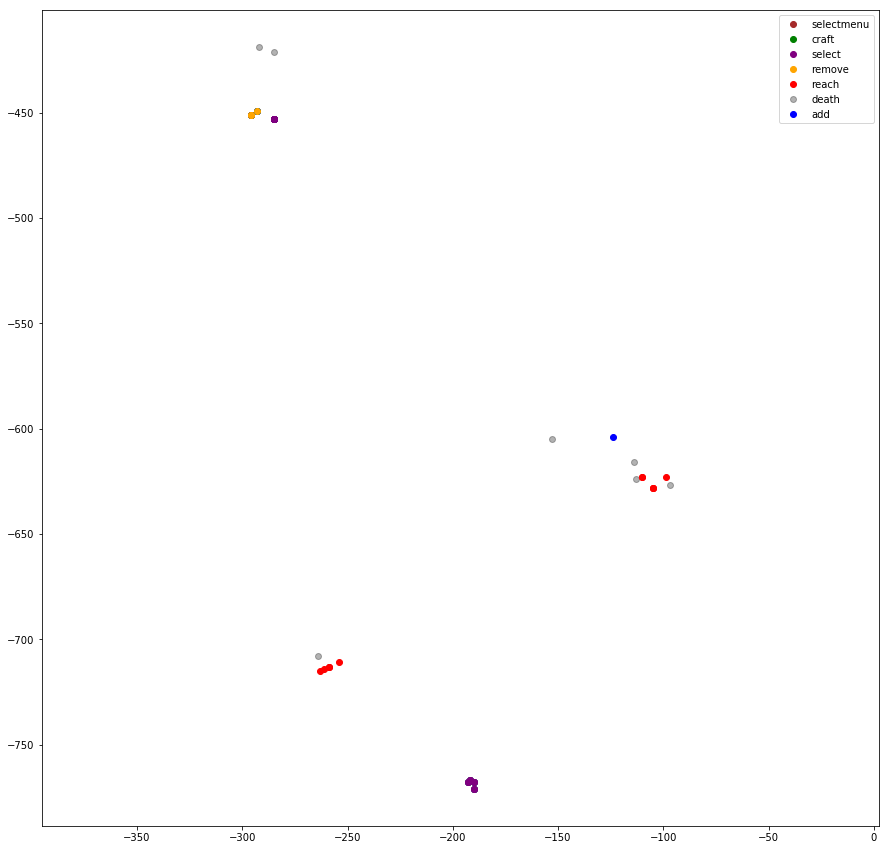

In [103]:
plt.figure(figsize=(15,15))
plt.axis('equal')

# c = ["black", "red", "blue", "green"]
c = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', ]
# a = [ 0.3, 1, 1,1 ]
a = [ 0.3, 1, 1, 1, 1, 1, 1, 1, 1, 1, ]

scatters = {}

for i, t in enumerate(types):
  pts = subset[subset["type"] == t]
  x = pts["x"]
  y = pts["y"]

  scatters[t] = plt.plot(x, y, 'o', c=c[i], lw=0, alpha=a[i])

plt.legend([ x[0] for x in scatters.values()], scatters.keys())
plt.show()

In [172]:
_mapBackground = image.imread('../../images/map.png') = image.imread('../../images/map.png')

In [173]:
type(_mapBackground)

numpy.ndarray

In [174]:
len(_mapBackground)

1023

In [181]:
en(_mapBackground[0])

995

In [183]:
_mapBackground.shape

(1023, 995, 3)

In [220]:
#types = allTypes
subset = allLocatedEventsDF

In [249]:
allLocatedEventsDF[allLocatedEventsDF['type'] == 'complete']

,type,section,x,y
1178,complete,tutorial1.Checkpoint14,441,-472
2881,complete,tutorial1.Checkpoint14,441,-478
2883,complete,tutorial1.Checkpoint14,441,-472
3618,complete,tutorial1.Checkpoint14,441,-473
6045,complete,tutorial1.Checkpoint14,441,-473
6927,complete,tutorial1.Checkpoint14,441,-472
7996,complete,tutorial1.Checkpoint14,441,-472
9472,complete,tutorial1.Checkpoint14,440,-483
10264,complete,tutorial1.Checkpoint14,441,-472
11392,complete,tutorial1.Checkpoint14,440,-483


In [289]:


print(getGraphPosition(imgStartCoordinates))
print(getGraphPosition(imgEndCoordinates))

[-229.0, -608.0]
[441.0, -472.0]


In [290]:
print(getXGraphPosition(minX))
print(getXGraphPosition(maxX))
print(getYGraphPosition(minY))
print(getYGraphPosition(maxY))

-1345.22
885.8799999999999
-1243.591836734694
-8.48979591836735


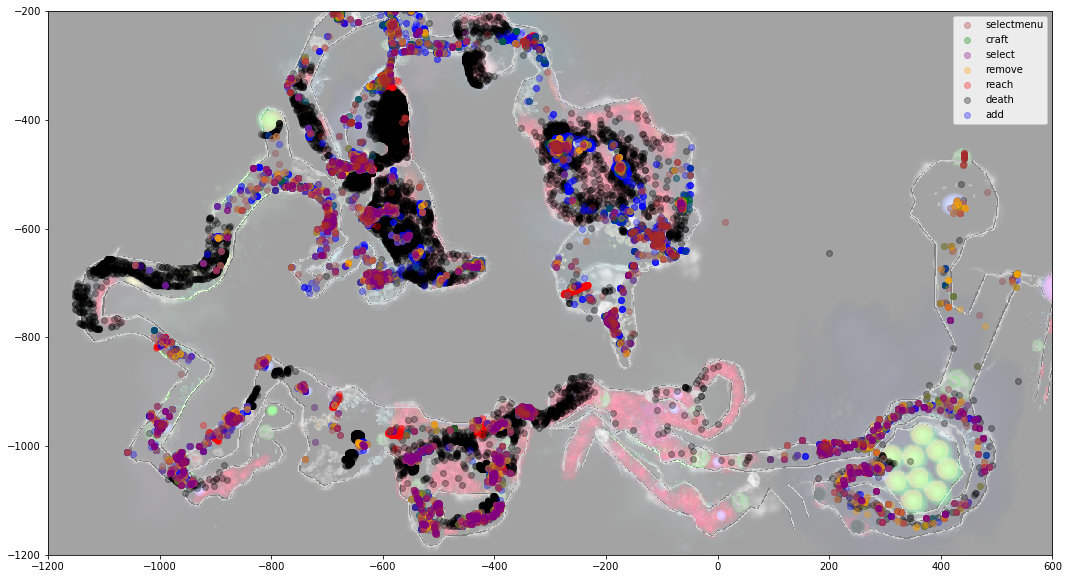

In [291]:
initializeConstants()

plt.figure(figsize=(18,10))

# background map display
mapBackground = image.imread('../../images/map.tutorial1.png')

minX = 0
maxX = mapBackground.shape[1]
minY = mapBackground.shape[0]
maxY = 0

plt.imshow(mapBackground, aspect='auto', zorder=-1, \
           extent=(getXGraphPosition(minX), getXGraphPosition(maxX), getYGraphPosition(minY), getYGraphPosition(maxY)), \
           alpha=0.5)


c = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', ]
a = [ 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, ]
scatters = {}

for i, t in enumerate(types):
  pts = subset[subset['type'] == t]
  x = pts['x']
  y = pts['y']

  scatters[t] = plt.plot(x, y, 'o', c=c[i], lw=0, alpha=a[i])

plt.legend([ x[0] for x in scatters.values()], scatters.keys())

# minX=-1152
# maxX=539
# minY=-1161
# maxY=-100
# tutorial1
plt.xlim([-1200, 600])
plt.ylim([-1200, -200])
#plt.axis('equal')
plt.show()